# Ejemplo de manipulación de los datos
La idea de esta notebook es mostrar de forma básica el funcionamiento de este proyecto.
A diferencia de esta app donde los datos son obtenidos a través de una API teniendo en cuenta los permisos del usuario actual, acá vamos a importarlos desde un JSON, simulando los datos que nos va a dar el core a través de la API.


## Paso 1

Importo el DataTransformer

In [1]:
from source.transformer import DataTransformer

## Paso 2
Traigo los datos, que en este caso es un JSON de alumnos con legajo falso

In [2]:
import json
with open('alumnos_test.json', 'r') as archivo_alumnos:
    data=json.loads(archivo_alumnos.read())

## Paso 3
Transformo los datos a un DataFrame que puede ser manipulado por Pandas

In [3]:
dataframe = DataTransformer().transform_to_dataframe(data)
dataframe

,id,nota,alumno,carrera,fecha,resultado,materia.id,materia.materia,materia.plan,materia.nucleo,materia.creditos,materia.area,materia.codigo
0,1,A,1,D,2002-08-22,A,156,FISICA I,2003,None,12,None,69
1,2,A,1,D,2002-08-22,A,157,ELECTRÓNICA ANALÓGICA,2003,None,12,None,355
2,3,A,1,D,2002-08-22,A,158,INSTRUMENTACIÓN I,2003,None,12,None,834
3,4,A,1,D,2003-10-31,A,159,ALGORITMOS Y PROG. I,2003,None,10,None,191
4,5,A,1,D,2002-08-22,A,160,12 CREDITOS,2003,None,12,None,E0086
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,150,,3,D,2011-07-31,U,165,TEORÍA DE CIRCUITOS I,2003,None,12,None,777
150,151,,3,D,2018-12-20,U,165,TEORÍA DE CIRCUITOS I,2003,None,12,None,777
151,152,,3,D,2009-01-05,U,197,Inglés I,2003,None,0,None,90000
152,153,,3,D,2011-07-31,U,197,Inglés I,2003,None,0,None,90000


Estos son los posibles valores de la columna "resultado"
- U: Libre
- U: Ausente
- R: Reprobó
- A: Regular
- P: Acreditó
- N: No Acreditó
- E: Pendiente Aprobación
- E: Pendiente Virtual

## Filtro columnas

En este caso, solo me interesan las columnas 'materia' y 'nota'.
Sacando las notas que son 'A' y 'PA', y sacando los que no tienen datos

In [10]:
#Filtro las materias que tiene nota distinto a A y PA, y saco las que no tienen nota
nota_no_A = lambda x: dataframe.nota != 'A'
nota_no_PA = lambda x: dataframe.nota != 'PA'
df = dataframe[['materia.materia','nota', 'fecha']]
df = df[nota_no_A]
df = df[nota_no_PA]
df = df.dropna()
df = df[lambda x: dataframe.nota != '']
#Transformo la columna 'nota' en un numero
df['nota']=df['nota'].astype(float)
#Agrupo los datos por materia
notas_agrupadas = df.groupby('materia.materia')

/home/nachoyegro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/nachoyegro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [11]:
#Calculo la media
notas_mean = notas_agrupadas['nota'].mean()
notas_mean

materia.materia
ALGEBRA Y GEOMETRIA ANALITICA      7.666667
ALGORITMOS Y PROG. I               8.000000
ANALISIS MATEMATICO I              7.500000
ANALISIS MATEMATICO II             7.333333
ANALISIS MATEMATICO III            6.333333
ANÁLISIS MATEMÁTICO IV             5.666667
ARQUITECTURA NAVAL I               9.000000
ASPECTOS LEGALES EN LA ING.        8.666667
COMPUTADORES                       9.000000
COMPUTADORES II                    8.000000
COMUNICACIÓN DE DATOS              7.000000
CONTROL AUTOMÁTICO I               6.000000
CONTROL AUTOMÁTICO II              6.500000
CONTROL DE ROBOTS                  7.000000
DISEÑO DE CONT. DIGITALES          6.000000
ELECTRÓNICA ANALÓGICA I            7.000000
ELEMENTOS DE HIGIENE Y SEGUR       6.000000
Electrónica Industrial             7.000000
FISICA I                           7.500000
FISICA II                          8.333333
FORMULACIÓN Y EVALUACIÓN DE PR     7.000000
FÍSICA III                         7.666667
INSTRUMENTACIÓN 

## Calculo la mediana

In [12]:
notas_median = notas_agrupadas['nota'].median()
notas_median

materia.materia
ALGEBRA Y GEOMETRIA ANALITICA      7.0
ALGORITMOS Y PROG. I               8.0
ANALISIS MATEMATICO I              7.5
ANALISIS MATEMATICO II             7.0
ANALISIS MATEMATICO III            6.0
ANÁLISIS MATEMÁTICO IV             6.0
ARQUITECTURA NAVAL I               9.0
ASPECTOS LEGALES EN LA ING.        9.0
COMPUTADORES                       9.0
COMPUTADORES II                    8.0
COMUNICACIÓN DE DATOS              7.0
CONTROL AUTOMÁTICO I               6.0
CONTROL AUTOMÁTICO II              6.5
CONTROL DE ROBOTS                  7.0
DISEÑO DE CONT. DIGITALES          6.0
ELECTRÓNICA ANALÓGICA I            7.0
ELEMENTOS DE HIGIENE Y SEGUR       6.0
Electrónica Industrial             7.0
FISICA I                           7.5
FISICA II                          8.0
FORMULACIÓN Y EVALUACIÓN DE PR     7.0
FÍSICA III                         8.0
INSTRUMENTACIÓN I                  5.0
INSTRUMENTOS Y MEDICIONES          8.0
INT. A LA AUTOMAT. Y CONTROL      10.0
Inglés I 

## Promedio de notas a través del tiempo
Para esto, tengo que agrupar por fecha y sacar una media

<function matplotlib.pyplot.show(*args, **kw)>

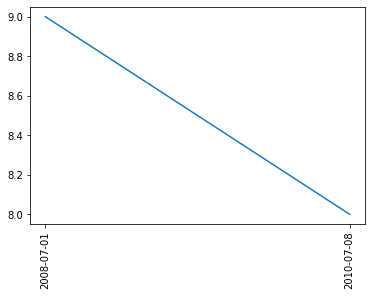

In [15]:
import matplotlib.pyplot as plt
#Selecciono QUIMICA I de entre todas las materias
quimica = df.loc[df['materia.materia'] == 'QUÍMICA I']
#Lo ordeno por fecha
quimica = quimica.sort_values('fecha', ascending=True)
#Calculo la media por cada fecha
quimica = quimica.groupby('fecha')['nota'].mean()
#Lo grafico
plt.plot(quimica)
plt.xticks(rotation='vertical')
plt.show